## Numerical experiments with the Lorenz equations

We are going to analyse the Lorenz equations:


\begin{align}
\dot{x} & = \sigma (y-x) \\
\dot{y} & = rx-xz-y \\
\dot{z} & = xy-bz
\end{align}

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

### Function definition
Define a function to describe the Lorenz ODE:
We choose $\sigma=10$ and $b = 8/3$.

In [42]:
sigma = 10
b = 8/3
r = 28

def lorenz(t, y):
    dx = sigma*(y[1] - y[0])
    dy = y[0] * (r - y[2]) - y[1]
    dz = y[0]*y[1] - b*y[2]
    
    return np.array([dx, dy, dz])

We use `solve_ivp` tool for solving our initial value problems. We plot the trajectories. 

In [43]:
r = 28
x0 = 1
y0 = 1
z0 = 1
sol = solve_ivp(lorenz, [0,100], [x0, y0, z0],
                dense_output = True, rtol = 1e-6)

Text(0, 0.5, 'Z')

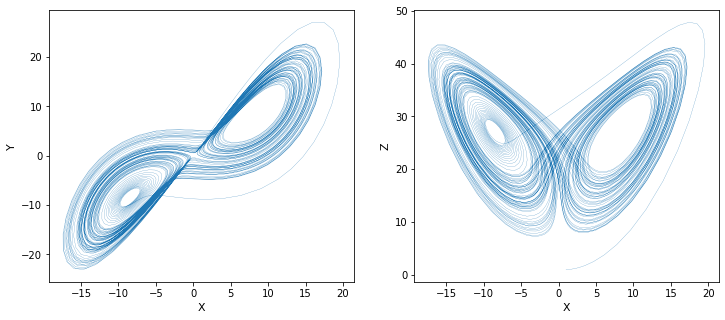

In [44]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(sol.y[0], sol.y[1], linewidth = 0.2)
ax1.set_xlabel("X", fontsize = 11)
ax1.set_ylabel("Y", fontsize = 11)

ax2.plot(sol.y[0], sol.y[2], linewidth = 0.2)
ax2.set_xlabel("X", fontsize = 11)
ax2.set_ylabel("Z", fontsize = 11)

We can also play with r and the initial conditions (x0, y0,z0) to see their effect on trajectories.

We can also plot the individual variables as a function of time

Text(0, 0.5, 'Z')

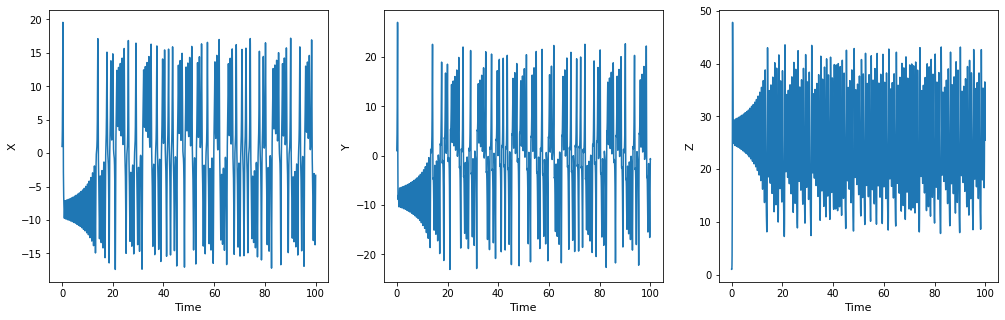

In [45]:
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))

ax1.plot(sol.t, sol.y[0])
ax2.plot(sol.t, sol.y[1])
ax3.plot(sol.t, sol.y[2])

ax1.set_xlabel("Time", fontsize = 11)
ax2.set_xlabel("Time", fontsize = 11)
ax3.set_xlabel("Time", fontsize = 11)
ax1.set_ylabel("X", fontsize = 11)
ax2.set_ylabel("Y", fontsize = 11)
ax3.set_ylabel("Z", fontsize = 11)

To see a 3D plot, we can use the %matplotlib notebook to get an interactive plot widget in Jupyter. To see the plot, uncomment the following cell:

In [46]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# fig = plt.figure()
# ax = Axes3D(fig)

# ax.plot(sol.y[0], sol.y[1], sol.y[2], linewidth = 0.2)

# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_xlabel("Y")

### Finding the maximums
Define a function that outputs the $z$-derivative for finding the maximums. A maximum occurs when this function crosses zero with a negative slope:

In [36]:
def maxima(t, y):
    return y[0]*y[1] - b*y[2]

maxima.direction = -1

In [37]:
sol = solve_ivp(lorenz, [0,100], [1, 1, 1],
                events = maxima,
                dense_output = True, rtol = 1e-6)

sect = sol.sol(sol.t_events[0])[:,20:]

Text(0, 0.5, 'Z')

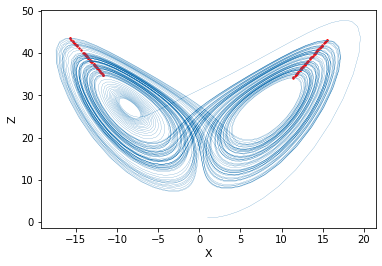

In [38]:
plt.plot(sol.y[0], sol.y[2], linewidth = 0.2)
plt.scatter(sect[0], sect[2], s=2, color = 'r')

plt.xlabel("X", fontsize = 11)
plt.ylabel("Z", fontsize = 11)

### Recurrence map

Make a scatter plot between the heights of the maximums $z_n$ and the height of the following maximum $z_{n+1}$.

Text(0, 0.5, '$z_{n+1}$')

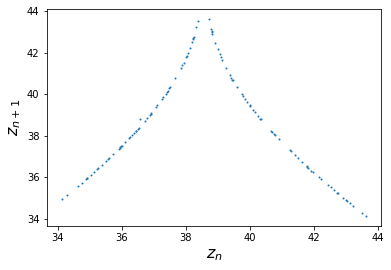

In [40]:
plt.scatter(sect[2], np.roll(sect[2], -1), s=1)

plt.xlabel("$z_n$", fontsize = 16)
plt.ylabel("$z_{n+1}$", fontsize = 16)